<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/02_1_Exploratory_final_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Total_staff_by_employee.csv .

import pandas as pd
staff = pd.read_csv('Total_staff_by_employee.csv', sep=';')

# Exploratory analysis of the random data generated as Staff Data

In this notebook we are going to analyze the data we have generate for our analysis from the real data we had. This data represents a company staff a row by employee. We have a final column which stays if the employee has had any accident

Columns in our dataframe:

- Codigo accidentado
- Turno
- Gender
- Planta
- Tipo accidente
- Tipo trabajador
- Fabrica
- Tecnología
- Pais
- Horas Presencia Efectiva Subcontratados
- Horas Presencia Efectiva ETTs
- Horas Formacion Seguridad Propios
- Horas Formacion Seguridad ETTs
- Accident
- wk_position
- Age
- Severity
- Accident_place

#### Attention: This notebook contains Altair charts so it wont be displayed in Github

In [2]:
staff.drop(columns={'Unnamed: 0'}, inplace=True)
staff.head(15)

,Codigo accidentado,Turno,Gender,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place
0,HS-CLMB_2546,Turno de mañana,Hombre,20,Accidente c/b,ETT,Burgos,Skinpass,España,25249.0,42484.0,1419.3,830.1,Yes,Gruista LONGI004 y LONGI008,Entre 30-50,Leve,Mantenimiento
1,HS-CEPA_2563,Turno de mañana,Hombre,19,Accidente c/b,Indefinido,Burgos,Recocido,España,25249.0,42484.0,1419.3,830.1,Yes,Operador Puente-Grúa,Mayor 50,Muy grave,Mantenimiento
2,HS-GNVT_2564,Turno de tarde,Hombre,12,Accidente s/b,Duración Determinada,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,Yes,hanger,Entre 30-50,Muy grave,Mantenimiento
3,HS-GNVT_2565,Turno de mañana,Hombre,12,Incidente,ETT,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,Yes,Titular Circulares,Entre 30-50,Grave,Mantenimiento
4,HS-DNGG_2566,Turno de mañana,Hombre,41,Incidente,Incidente (no aplica),Hiasa,Corte Láser,España,0.0,167848.0,1300.5,101.5,Yes,Control Calidad,Entre 30-50,Grave,Mantenimiento
5,HS-SAUS_2577,Turno de mañana,Hombre,7,Incidente,Indefinido,Barcelona,Cizalla,España,25684.5,18302.3,1150.6,151.5,Yes,Operador Logistico,Mayor 50,Muy grave,Mantenimiento
6,HS-BRCL_3127,Turno de tarde,Hombre,1,Incidente,Incidente (no aplica),Argentina,Blanking,Argentina,0.0,0.0,606.5,0.0,Yes,Embaladora 2,Entre 30-50,Grave,Mantenimiento
7,HS-BRCL_3220,Turno de tarde,Hombre,1,Incidente,Indefinido,Argentina,Blanking,Argentina,0.0,0.0,606.5,0.0,Yes,AYUDANTE PRENS001,Mayor 50,Muy grave,Mantenimiento
8,HS-BRCL_3221,Turno de tarde,Hombre,1,Incidente,Incidente (no aplica),Argentina,Blanking,Argentina,0.0,0.0,606.5,0.0,Yes,Gruista perfiladoras,Mayor 50,Muy grave,Mantenimiento
9,HS-NVRR_3222,Turno de mañana,Hombre,13,Incidente,Incidente (no aplica),Burgos,Blanking,España,25249.0,42484.0,1419.3,830.1,Yes,packaking -road safety,Entre 30-50,Leve,Mantenimiento


In [3]:
len(staff)

21210

In [4]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21210 entries, 0 to 21209
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Codigo accidentado                       4180 non-null   object 
 1   Turno                                    21210 non-null  object 
 2   Gender                                   21210 non-null  object 
 3   Planta                                   21210 non-null  int64  
 4   Tipo accidente                           4180 non-null   object 
 5   Tipo trabajador                          21210 non-null  object 
 6   Fabrica                                  21210 non-null  object 
 7   Tecnología                               21210 non-null  object 
 8   Pais                                     21210 non-null  object 
 9   Horas Presencia Efectiva Subcontratados  21210 non-null  float64
 10  Horas Presencia Efectiva ETTs            21210

In [5]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place'],
      dtype='object')

In [6]:
staff.shape

(21210, 18)

In [7]:
#number of employees
len(staff)

21210

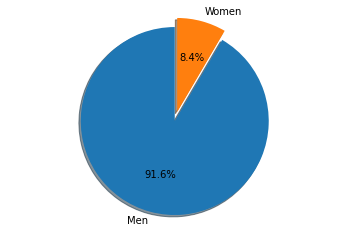

In [8]:
import matplotlib.pyplot as plt

labels = 'Men', 'Women'
sizes = [len(staff[staff['Gender']=='Hombre']), len(staff[staff['Gender']=='Mujer'])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
staff['Accident']

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
21205     No
21206     No
21207     No
21208     No
21209     No
Name: Accident, Length: 21210, dtype: object

A 19.7% of our employees has had an accident during its time in time company

In [10]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place'],
      dtype='object')

In [11]:
staff['N employees'] = 1

In [12]:
staff['Severity'] = staff['Severity'].fillna('N/A')

In [13]:
staff['Tipo accidente'] = staff['Tipo accidente'].fillna('N/A')

In [14]:
# we are going to aggregate the data in order to be able to plot it in a clear way

n_employees = staff.groupby(by=['Fabrica',
       'Accident', 'Severity']).agg('sum')


In [15]:
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)

In [16]:
n_employees = n_employees.reset_index()
n_employees.head()

,Fabrica,Accident,Severity,N employees
0,Argentina,No,N/A,923
1,Argentina,Yes,Grave,307
2,Argentina,Yes,Leve,297
3,Argentina,Yes,Muy grave,311
4,Arizona,No,N/A,1280


In [17]:
import altair as alt


In [18]:
!pip install altair_viewer

In [19]:
import altair_viewer

In [20]:
import altair as alt
from vega_datasets import data


alt.renderers.enable(embed_options={'theme': 'latimes'})



RendererRegistry.enable('colab')

On this chart we can appreciate that those countries with less employees are the ones with more accidents

In [21]:
alt.Chart(n_employees, title='Nº Employees by Fabric and Accident/No Accident').mark_point().encode( 
    y = 'N employees', x ='Fabrica', color='Accident', tooltip=['Severity','N employees','Fabrica']).interactive().properties(
    width=800,
    height=300
)


alt.Chart(...)

In [22]:
n_employees = staff.groupby(by=['Tecnología',
       'Accident', 'Severity']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,Tecnología,Accident,Severity,N employees
0,Blanking,No,N/A,2698
1,Blanking,Yes,Grave,244
2,Blanking,Yes,Leve,241
3,Blanking,Yes,Muy grave,237
4,Cizalla,No,N/A,1359


In [23]:
n_employees_acc = n_employees[n_employees['Accident']=='Yes']
n_employees_acc.rename(columns={'N employees':'N accidents', 'Tecnología':'Technology'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
alt.Chart(n_employees_acc,title="Nº Accidents by Technology and Sevirity").mark_line().encode( 
    y = 'N accidents',
    x ='Technology',
    color='Severity').interactive() .properties(
    width=1000,
    height=300
)

alt.Chart(...)

In [25]:
staff_2 = staff
staff_2['Training hours'] = staff['Horas Formacion Seguridad Propios'] + staff['Horas Formacion Seguridad ETTs']


In [26]:

staff_2 = staff_2.groupby(['Fabrica', 'Accident']).sum()
staff_2 = staff_2[['N employees', 'Training hours']].reset_index()
staff_2['T_hours_employee'] = staff_2['Training hours'] / staff_2['N employees']
staff_2 = staff_2[staff_2['Accident']=='Yes']
staff_2.rename(columns={'N employees':'N accidents'}, inplace=True)
staff_2.head()

,Fabrica,Accident,N accidents,Training hours,T_hours_employee
1,Argentina,Yes,915,554947.5,606.5
3,Arizona,Yes,383,0.0,0.0
5,Barcelona,Yes,300,390630.0,1302.1
7,Burgos,Yes,1359,3056934.6,2249.4
9,Campinas,Yes,432,523800.0,1212.5


In [27]:
base = alt.Chart(staff_2, title='Comparing N accident with Training hours by employee').encode(x='Fabrica')

alt.layer(base.mark_line(color='blue').encode(y='N accidents'),base.mark_line(color='red').encode(y='T_hours_employee')).properties(
    width=900,
    height=300)

alt.LayerChart(...)

In [28]:
n_accidents = staff.groupby(['Turno', 'Accident']).sum()
n_accidents = n_accidents[['N employees']]
n_accidents = n_accidents.reset_index()
n_accidents

,Turno,Accident,N employees
0,Turno de mañana,No,5728
1,Turno de mañana,Yes,2289
2,Turno de noche,No,5761
3,Turno de noche,Yes,508
4,Turno de tarde,No,5541
5,Turno de tarde,Yes,1383


In [29]:
alt.Chart(n_accidents,title="Nº Accidents by Work Turn").mark_line().encode( 
    y = 'N employees',
    x ='Turno',
    color='Accident').interactive() .properties(
    width=1000,
    height=300
)

alt.Chart(...)

## Now we are going to analyze the profile of the employees in the company

Our staff is composed mainly by men, in a 91.4%

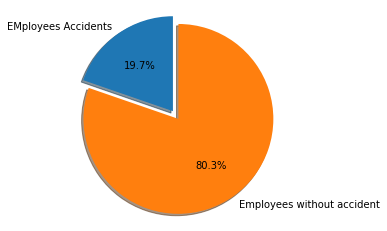

In [30]:
labels = 'EMployees Accidents', 'Employees without accident'
sizes = [len(staff[staff['Accident']=='Yes']), len(staff[staff['Accident']=='No'])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [31]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'N employees', 'Training hours'],
      dtype='object')

In [32]:
n_employees = staff.groupby(by=['Fabrica', 'Gender','Tipo trabajador']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,Fabrica,Gender,Tipo trabajador,N employees,Training hours
0,Argentina,Hombre,Cedidos de otras plantas,80,48520.0
1,Argentina,Hombre,Duración Determinada,110,66715.0
2,Argentina,Hombre,ETT,143,86729.5
3,Argentina,Hombre,Incidente (no aplica),618,374817.0
4,Argentina,Hombre,Indefinido,322,195293.0


In [33]:
types = staff['Tipo trabajador'].unique()
types

array(['ETT', 'Indefinido', 'Duración Determinada',
       'Incidente (no aplica)', 'Subcontratado', 'Prácticas',
       'Cedidos de otras plantas', 'No aplica', 'Indefinido con preaviso'],
      dtype=object)

The Fabrics with most employees are Hiasa and Burgos

In [34]:
alt.Chart(n_employees, title="Nº employees by Fabric and Gender").mark_bar().encode( 
    y = 'N employees',
    x ='Fabrica',
     color='Gender').properties(
    width=1000,
    height=300
)


alt.Chart(...)

In [35]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'N employees', 'Training hours'],
      dtype='object')

In [36]:
n_employees = staff.groupby(by=['Age', 'Gender']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,Age,Gender,N employees,Training hours
0,Entre 30-50,Hombre,8751,10211335.1
1,Entre 30-50,Mujer,795,886787.1
2,Mayor 50,Hombre,6694,7847993.7
3,Mayor 50,Mujer,595,677621.6
4,Menor 30,Hombre,3978,4717726.1


The majority of the employees are Men between 30-50 years

In [37]:
alt.Chart(n_employees, title="Nº employees by Age and Gender").mark_bar().encode( 
    y = 'N employees',
    x ='Age',
     color='Gender').properties(
    width=700,
    height=300
)

alt.Chart(...)

In [38]:
n_employees = staff.groupby(by=['wk_position']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,wk_position,N employees,Training hours
0,-,27,35083.7
1,.,25,31833.6
2,/,42,53293.3
3,: Operador II,31,39097.0
4,APILADOR TRANS002,28,36841.7


In [39]:
n_employees = n_employees.sort_values(by='N employees', ascending=False).head(100)

We are going to plot the 100 work positions with more employees in the company

In [44]:
alt.Chart(n_employees, title="Nº employees by Work position").mark_bar().encode( 
    y = 'N employees',
    x ='wk_position',
     ).properties(
    width=1000,
    height=300
)
     



alt.Chart(...)

Some information about our numerical data on trainning hours and working hours

In [41]:
staff[['Horas Presencia Efectiva Subcontratados',	'Horas Presencia Efectiva ETTs',	'Horas Formacion Seguridad Propios',	'Horas Formacion Seguridad ETTs',	'N employees']].describe()

,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,N employees
count,21210.000000,21210.000000,21210.000000,21210.000000,21210.0
mean,11940.092114,51779.378225,960.195040,208.931509,1.0
std,17376.527532,64567.736397,507.842686,323.662662,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,211.000000,606.500000,0.000000,1.0
50%,0.000000,29316.000000,1212.500000,56.300000,1.0
75%,25249.000000,46112.000000,1419.300000,151.500000,1.0
max,72495.200000,167848.000000,1542.900000,830.100000,1.0
